In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [2]:
for i in range(1):
    if i==0:
        train = pd.read_pickle('salida/nuevo3/RTEGLUE/TRAIN_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo3/RTEGLUE/TRAIN_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            pass

In [3]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,clases
0,0.000000,0.000000,1.785,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,6,1.000000,0,,0,,not_entailment
1,3.792814,1.455581,2.579,2.608,3.808101,0.003099,0.685379,1,0.045455,0,8,1,22,0.500000,0,,0,,entailment
2,0.000000,0.000000,2.369,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,21,1.000000,0,,0,,entailment
3,1.013545,1.497296,2.055,1.537,3.827009,0.004184,0.265281,1,0.032258,0,7,1,31,0.857143,0,,0,,entailment
4,1.963785,2.920542,1.527,1.293,4.067671,0.003548,0.448161,1,0.045455,0,6,2,44,0.500000,0,,0,,not_entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,0.000000,0.000000,1.758,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,10,0.600000,0,,0,,not_entailment
2486,0.000000,0.000000,1.656,0.000,0.000000,0.000000,0.000000,1,0.000000,0,4,0,73,1.000000,0,,0,,entailment
2487,0.642299,1.462296,2.747,1.700,4.080920,0.004082,0.364700,2,0.052632,0,5,1,19,0.600000,0,,0,,not_entailment
2488,0.000000,0.000000,1.976,0.000,0.000000,0.000000,0.000000,2,0.000000,0,7,0,72,1.000000,0,,0,,entailment


<Axes: title={'center': 'Jaro-Winkler_rit'}, xlabel='clases'>

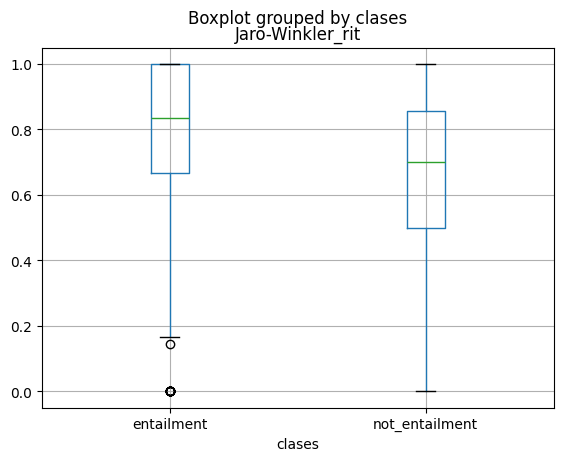

In [4]:
train.boxplot(by="clases",column="Jaro-Winkler_rit")

## Eliminar características

In [5]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
#train=train.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,clases
0,0.000000,0.000000,1.785,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,6,1.000000,0,,0,,not_entailment
1,3.792814,1.455581,2.579,2.608,3.808101,0.003099,0.685379,1,0.045455,0,8,1,22,0.500000,0,,0,,entailment
2,0.000000,0.000000,2.369,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,21,1.000000,0,,0,,entailment
3,1.013545,1.497296,2.055,1.537,3.827009,0.004184,0.265281,1,0.032258,0,7,1,31,0.857143,0,,0,,entailment
4,1.963785,2.920542,1.527,1.293,4.067671,0.003548,0.448161,1,0.045455,0,6,2,44,0.500000,0,,0,,not_entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,0.000000,0.000000,1.758,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,10,0.600000,0,,0,,not_entailment
2486,0.000000,0.000000,1.656,0.000,0.000000,0.000000,0.000000,1,0.000000,0,4,0,73,1.000000,0,,0,,entailment
2487,0.642299,1.462296,2.747,1.700,4.080920,0.004082,0.364700,2,0.052632,0,5,1,19,0.600000,0,,0,,not_entailment
2488,0.000000,0.000000,1.976,0.000,0.000000,0.000000,0.000000,2,0.000000,0,7,0,72,1.000000,0,,0,,entailment


In [6]:
train[(train["list_m"]!=0) & (train["clases"]=="YES")]

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,clases


In [7]:
train.columns

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'verbT',
       'negH', 'verbH', 'clases'],
      dtype='object')

In [8]:
train=train.drop(["verbT","verbH"],axis=1)

In [9]:
#train = train[['list_incomp','list_incomp','Jaro-Winkler_rit','list_m','negT', 'negH','clases']]
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,clases
0,0.000000,0.000000,1.785,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,6,1.000000,0,0,not_entailment
1,3.792814,1.455581,2.579,2.608,3.808101,0.003099,0.685379,1,0.045455,0,8,1,22,0.500000,0,0,entailment
2,0.000000,0.000000,2.369,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,21,1.000000,0,0,entailment
3,1.013545,1.497296,2.055,1.537,3.827009,0.004184,0.265281,1,0.032258,0,7,1,31,0.857143,0,0,entailment
4,1.963785,2.920542,1.527,1.293,4.067671,0.003548,0.448161,1,0.045455,0,6,2,44,0.500000,0,0,not_entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,0.000000,0.000000,1.758,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,10,0.600000,0,0,not_entailment
2486,0.000000,0.000000,1.656,0.000,0.000000,0.000000,0.000000,1,0.000000,0,4,0,73,1.000000,0,0,entailment
2487,0.642299,1.462296,2.747,1.700,4.080920,0.004082,0.364700,2,0.052632,0,5,1,19,0.600000,0,0,not_entailment
2488,0.000000,0.000000,1.976,0.000,0.000000,0.000000,0.000000,2,0.000000,0,7,0,72,1.000000,0,0,entailment


In [10]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [11]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [12]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH
sumas,1.000000,0.350141,0.060390,0.737549,0.676585,0.273550,0.786671,0.024436,0.154185,0.199543,0.088371,0.336330,0.281909,-0.103310,0.063421,0.029502
distancias,0.350141,1.000000,-0.016074,0.635179,0.622692,0.383361,0.477826,0.373151,0.852258,0.189374,0.560242,0.997549,-0.092258,-0.329967,-0.052617,0.077524
entropia_total,0.060390,-0.016074,1.000000,0.134893,0.076302,0.055732,0.113739,0.073888,0.050678,0.014768,0.091291,-0.026282,-0.254447,0.073120,-0.066548,0.020752
entropias,0.737549,0.635179,0.134893,1.000000,0.957768,0.464659,0.881611,0.174883,0.530524,0.223317,0.255472,0.618650,-0.059353,-0.259180,-0.039035,0.066507
mutinf,0.676585,0.622692,0.076302,0.957768,1.000000,0.475820,0.832972,0.167612,0.518782,0.198174,0.236655,0.603270,-0.058977,-0.253230,-0.034828,0.066016
mearts,0.273550,0.383361,0.055732,0.464659,0.475820,1.000000,0.366876,0.142392,0.363070,0.104783,0.183965,0.393381,-0.096582,-0.176161,-0.047036,0.019268
max_info,0.786671,0.477826,0.113739,0.881611,0.832972,0.366876,1.000000,0.104478,0.368245,0.258494,0.158537,0.462685,0.016279,-0.211767,-0.011372,0.055049
list_comp,0.024436,0.373151,0.073888,0.174883,0.167612,0.142392,0.104478,1.000000,0.328580,0.046287,0.534024,0.375731,-0.116923,-0.085242,-0.032685,0.088087
diferencias,0.154185,0.852258,0.050678,0.530524,0.518782,0.363070,0.368245,0.328580,1.000000,0.160767,0.477993,0.854874,-0.270880,-0.323462,-0.100700,0.066815
list_incomp,0.199543,0.189374,0.014768,0.223317,0.198174,0.104783,0.258494,0.046287,0.160767,1.000000,0.116188,0.186362,-0.008594,0.011722,-0.003395,0.030637


<Axes: >

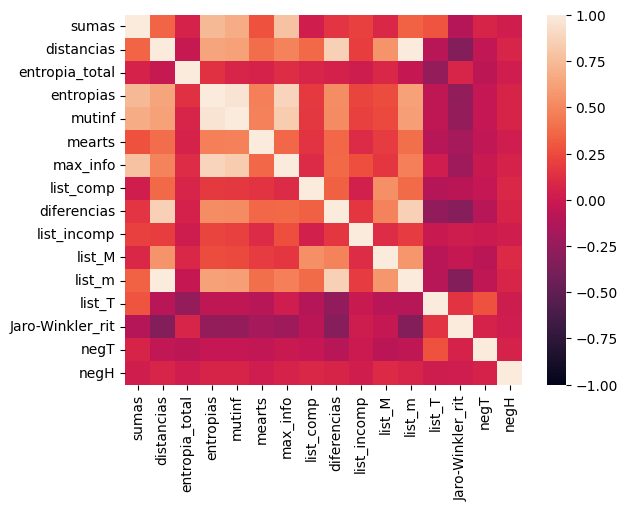

In [13]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [14]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH
sumas,1.000000,0.350141,0.060390,0.737549,0.676585,0.273550,0.786671,0.024436,0.154185,0.199543,0.088371,0.336330,0.281909,-0.103310,0.063421,0.029502
distancias,0.350141,1.000000,-0.016074,0.635179,0.622692,0.383361,0.477826,0.373151,0.852258,0.189374,0.560242,0.997549,-0.092258,-0.329967,-0.052617,0.077524
entropia_total,0.060390,-0.016074,1.000000,0.134893,0.076302,0.055732,0.113739,0.073888,0.050678,0.014768,0.091291,-0.026282,-0.254447,0.073120,-0.066548,0.020752
entropias,0.737549,0.635179,0.134893,1.000000,0.957768,0.464659,0.881611,0.174883,0.530524,0.223317,0.255472,0.618650,-0.059353,-0.259180,-0.039035,0.066507
mutinf,0.676585,0.622692,0.076302,0.957768,1.000000,0.475820,0.832972,0.167612,0.518782,0.198174,0.236655,0.603270,-0.058977,-0.253230,-0.034828,0.066016
mearts,0.273550,0.383361,0.055732,0.464659,0.475820,1.000000,0.366876,0.142392,0.363070,0.104783,0.183965,0.393381,-0.096582,-0.176161,-0.047036,0.019268
max_info,0.786671,0.477826,0.113739,0.881611,0.832972,0.366876,1.000000,0.104478,0.368245,0.258494,0.158537,0.462685,0.016279,-0.211767,-0.011372,0.055049
list_comp,0.024436,0.373151,0.073888,0.174883,0.167612,0.142392,0.104478,1.000000,0.328580,0.046287,0.534024,0.375731,-0.116923,-0.085242,-0.032685,0.088087
diferencias,0.154185,0.852258,0.050678,0.530524,0.518782,0.363070,0.368245,0.328580,1.000000,0.160767,0.477993,0.854874,-0.270880,-0.323462,-0.100700,0.066815
list_incomp,0.199543,0.189374,0.014768,0.223317,0.198174,0.104783,0.258494,0.046287,0.160767,1.000000,0.116188,0.186362,-0.008594,0.011722,-0.003395,0.030637


In [15]:
# Checar variables colineales
#sns.relplot(data=train_m, x="sumas", y="Jaro-Winkler_rit")

In [16]:
# RTE3
y_train=[]
for i in y_:
    if i == "entailment":
        y_train.append(1)
    else:
        y_train.append(0)

In [17]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

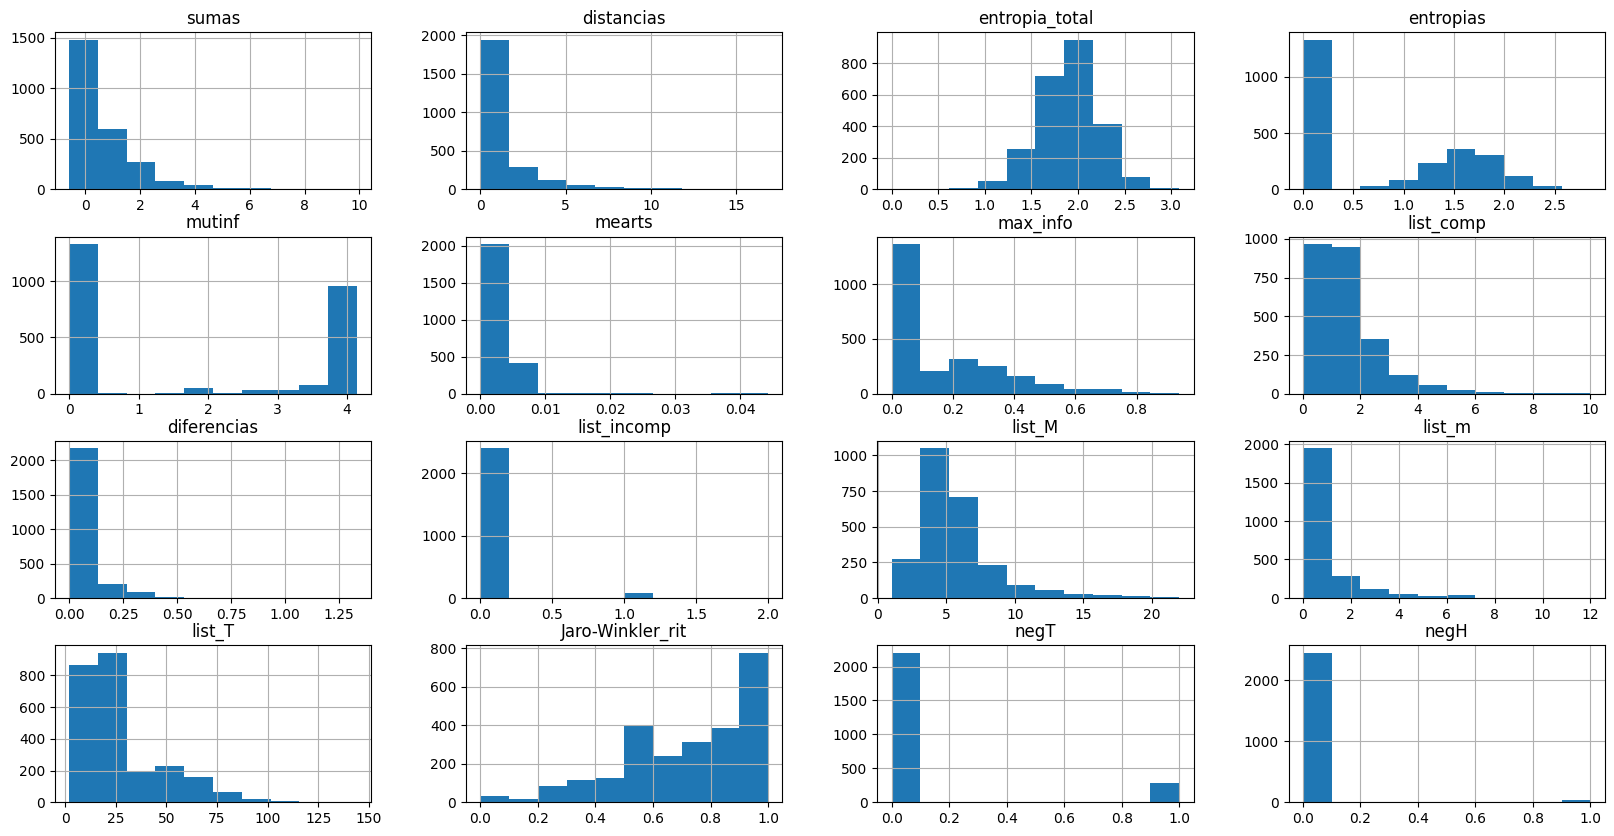

In [18]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [19]:
for i in range(1):
    if i==0:
        test = pd.read_pickle('salida/nuevo3/RTEGLUE/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo3/RTEGLUE/DEV_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            pass

In [20]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,clases
0,0.000000,0.000000,2.307,0.000,0.000000,0.000000,0.000000,2,0.000000,0,4,0,15,1.000000,0,,0,,not_entailment
1,1.010760,1.457585,2.290,1.681,3.794874,0.004036,0.475788,1,0.055556,1,4,1,18,0.750000,0,,0,,entailment
2,2.950815,1.469994,1.603,1.563,4.024432,0.003390,0.497577,0,0.014493,0,7,1,69,1.000000,0,,0,,not_entailment
3,2.045073,2.926682,1.869,1.517,3.980117,0.003999,0.160861,2,0.035088,0,7,2,57,0.714286,0,,0,,not_entailment
4,0.000000,0.000000,1.849,0.000,0.000000,0.000000,0.000000,2,0.000000,0,7,0,15,0.714286,0,,0,,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,0.953833,1.490092,2.073,2.055,3.941485,0.005496,0.333671,0,0.083333,0,6,1,12,0.833333,0,,0,,entailment
273,2.146580,1.475158,1.719,1.817,3.898449,0.002131,0.738151,0,0.040000,1,6,1,25,0.666667,0,,0,,entailment
274,0.000000,0.000000,1.745,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,33,1.000000,0,,0,,entailment
275,0.000000,0.000000,1.812,0.000,0.000000,0.000000,0.000000,1,0.000000,0,7,0,13,0.428571,0,,0,,entailment


In [21]:
#test=test.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#test = test[['list_incomp','list_incomp','Jaro-Winkler_rit','list_m','negT', 'negH','clases']]



In [22]:
test=test.drop(["verbT","verbH"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,clases
0,0.000000,0.000000,2.307,0.000,0.000000,0.000000,0.000000,2,0.000000,0,4,0,15,1.000000,0,0,not_entailment
1,1.010760,1.457585,2.290,1.681,3.794874,0.004036,0.475788,1,0.055556,1,4,1,18,0.750000,0,0,entailment
2,2.950815,1.469994,1.603,1.563,4.024432,0.003390,0.497577,0,0.014493,0,7,1,69,1.000000,0,0,not_entailment
3,2.045073,2.926682,1.869,1.517,3.980117,0.003999,0.160861,2,0.035088,0,7,2,57,0.714286,0,0,not_entailment
4,0.000000,0.000000,1.849,0.000,0.000000,0.000000,0.000000,2,0.000000,0,7,0,15,0.714286,0,0,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,0.953833,1.490092,2.073,2.055,3.941485,0.005496,0.333671,0,0.083333,0,6,1,12,0.833333,0,0,entailment
273,2.146580,1.475158,1.719,1.817,3.898449,0.002131,0.738151,0,0.040000,1,6,1,25,0.666667,0,0,entailment
274,0.000000,0.000000,1.745,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,33,1.000000,0,0,entailment
275,0.000000,0.000000,1.812,0.000,0.000000,0.000000,0.000000,1,0.000000,0,7,0,13,0.428571,0,0,entailment


In [23]:
test[(test["list_m"]==0) & (test["clases"]=="NO")].shape

(0, 17)

In [24]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [25]:
# RTE3
y_test=[]
for i in y_t:
    if i == "entailment":
        y_test.append(1)
    else:
        y_test.append(0)

In [26]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [27]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.        , 0.        , 0.57860616, ..., 1.        , 0.        ,
        0.        ],
       [0.38287901, 0.08621865, 0.83598055, ..., 0.5       , 0.        ,
        0.        ],
       [0.        , 0.        , 0.76790924, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.0648391 , 0.0866164 , 0.8904376 , ..., 0.6       , 0.        ,
        0.        ],
       [0.        , 0.        , 0.64051864, ..., 1.        , 0.        ,
        0.        ],
       [0.1378561 , 0.08515564, 0.60551053, ..., 0.66666667, 1.        ,
        0.        ]])

In [28]:
X_train.shape

(2490, 16)

In [29]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [30]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [31]:
model.decision_function(X_train)

array([ 0.81437135,  0.38860682,  0.85825269, ..., -0.00987918,
        0.60856652, -0.48567677])

In [32]:
labels=train.columns[:-1]
labels

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH'],
      dtype='object')

In [33]:
model.classes_

array([0, 1])

In [34]:
model.coef_[0]

array([ 0.01602216, -2.76410982,  1.27102196,  0.02977585, -0.07293673,
       -0.60530847,  0.37605514, -1.86330075, -1.01491178, -0.28550622,
        1.47300799, -3.06952301, -0.0998108 ,  0.85170591, -0.27026972,
       -0.26155626])

In [35]:
coeficientes=model.coef_[0]

In [36]:
coeficientes

array([ 0.01602216, -2.76410982,  1.27102196,  0.02977585, -0.07293673,
       -0.60530847,  0.37605514, -1.86330075, -1.01491178, -0.28550622,
        1.47300799, -3.06952301, -0.0998108 ,  0.85170591, -0.27026972,
       -0.26155626])

In [37]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  10 list_M 11 list_m


In [38]:

n_columns=train.shape[1]-1

In [39]:
n_columns

16

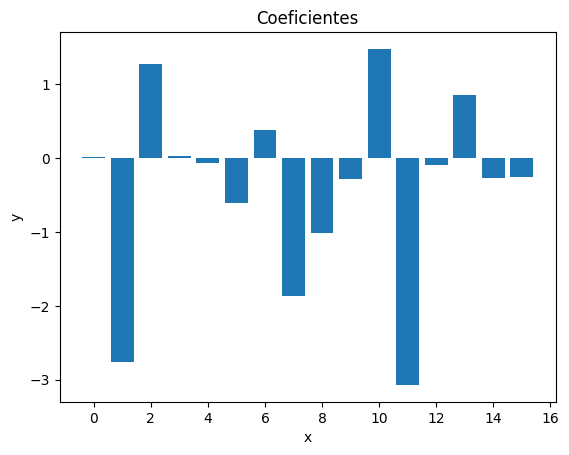

In [40]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [41]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.        , 0.        , 0.83135135, ..., 1.        , 0.        ,
        0.        ],
       [0.20588461, 0.16736225, 0.82522523, ..., 0.75      , 0.        ,
        0.        ],
       [0.60105987, 0.16878707, 0.57765766, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.62882883, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.65297297, ..., 0.42857143, 0.        ,
        0.        ],
       [0.        , 0.        , 0.66810811, ..., 1.        , 1.        ,
        0.        ]])

In [42]:
X_test.shape

(277, 16)

In [43]:
predictions = model.predict(X_test)

In [44]:
predictions

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [45]:
test["predicciones"]=predictions
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,clases,predicciones
0,0.000000,0.000000,2.307,0.000,0.000000,0.000000,0.000000,2,0.000000,0,4,0,15,1.000000,0,0,not_entailment,1
1,1.010760,1.457585,2.290,1.681,3.794874,0.004036,0.475788,1,0.055556,1,4,1,18,0.750000,0,0,entailment,0
2,2.950815,1.469994,1.603,1.563,4.024432,0.003390,0.497577,0,0.014493,0,7,1,69,1.000000,0,0,not_entailment,1
3,2.045073,2.926682,1.869,1.517,3.980117,0.003999,0.160861,2,0.035088,0,7,2,57,0.714286,0,0,not_entailment,0
4,0.000000,0.000000,1.849,0.000,0.000000,0.000000,0.000000,2,0.000000,0,7,0,15,0.714286,0,0,entailment,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,0.953833,1.490092,2.073,2.055,3.941485,0.005496,0.333671,0,0.083333,0,6,1,12,0.833333,0,0,entailment,0
273,2.146580,1.475158,1.719,1.817,3.898449,0.002131,0.738151,0,0.040000,1,6,1,25,0.666667,0,0,entailment,0
274,0.000000,0.000000,1.745,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,33,1.000000,0,0,entailment,1
275,0.000000,0.000000,1.812,0.000,0.000000,0.000000,0.000000,1,0.000000,0,7,0,13,0.428571,0,0,entailment,1


In [46]:
incorrectos = test[(test["clases"]=="YES") & (test["predicciones"]==0)]
incorrectos

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,clases,predicciones


In [47]:
print(confusion_matrix(y_test, predictions))

[[77 54]
 [54 92]]


In [48]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.61
precision:  0.63
recall 0.63
f1_score:  0.63
matthews_score:  0.22


In [49]:
X_train.shape

(2490, 16)

In [50]:
X_test.shape

(277, 16)

In [51]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [52]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [54]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.640000 (0.027351)
Logistic Regression Precision:: 0.620000 (0.035411)
Logistic Regression Recall:: 0.730000 (0.055553)
Logistic Regression F1-score:: 0.670000 (0.031701)


In [55]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.280000 (0.057515)


In [58]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [59]:
#linear_model

In [60]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [61]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59       131
           1       0.63      0.63      0.63       146

    accuracy                           0.61       277
   macro avg       0.61      0.61      0.61       277
weighted avg       0.61      0.61      0.61       277



In [120]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [121]:
test.columns[:-1]

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'clases'],
      dtype='object')

In [122]:
explainer.expected_value

0.18727246560912938

In [123]:
X_test

array([[0.        , 0.        , 0.75524712, ..., 0.4       , 0.        ,
        0.        ],
       [0.        , 0.        , 0.70040623, ..., 0.8       , 0.        ,
        0.        ],
       [0.        , 0.        , 0.59749492, ..., 0.5       , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.61882194, ..., 0.33333333, 0.        ,
        0.        ],
       [0.06309664, 0.14040234, 0.59817197, ..., 0.75      , 0.        ,
        0.        ],
       [0.        , 0.        , 0.859174  , ..., 0.875     , 0.        ,
        0.        ]])

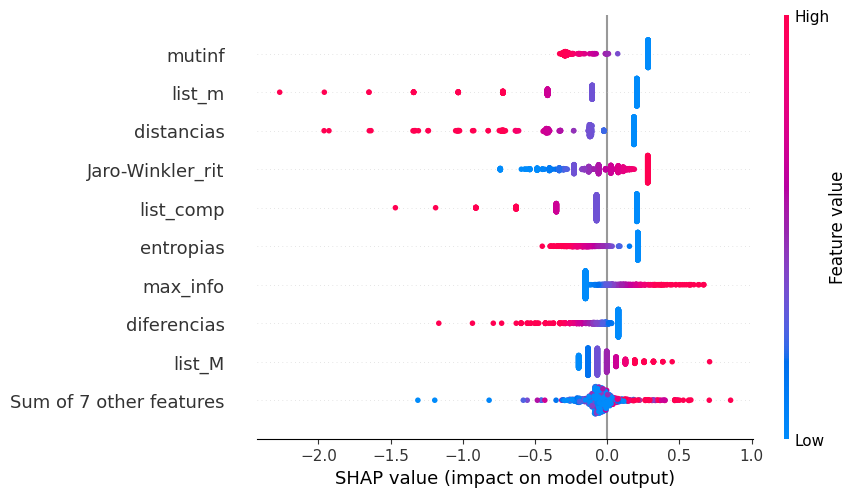

In [124]:
shap.plots.beeswarm(shap_values)

In [131]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.         0.         0.72047579 0.4        0.         0.        ] 0 0


IndexError: index 6 is out of bounds for axis 0 with size 6

In [94]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.         0.         0.73026745 0.         0.         0.
 0.         1.         0.38888889 0.         0.24137931 0.
 0.30275229 0.33333333 0.         0.66666667 0.95       0.
 1.        ]


IndexError: index 1 is out of bounds for axis 2 with size 1

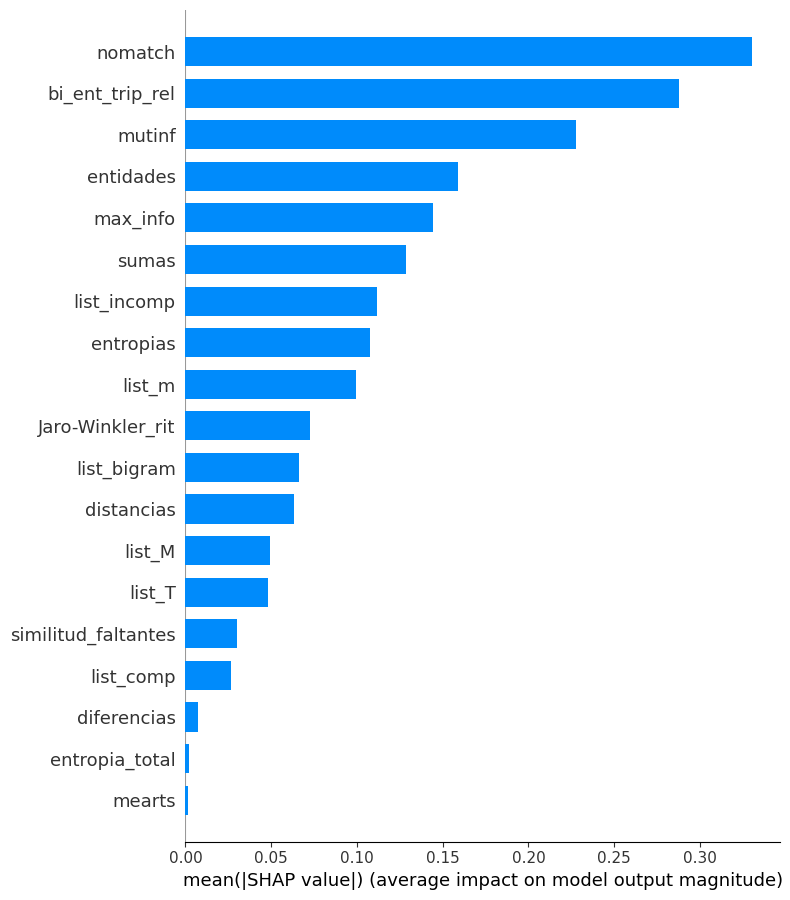

In [95]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

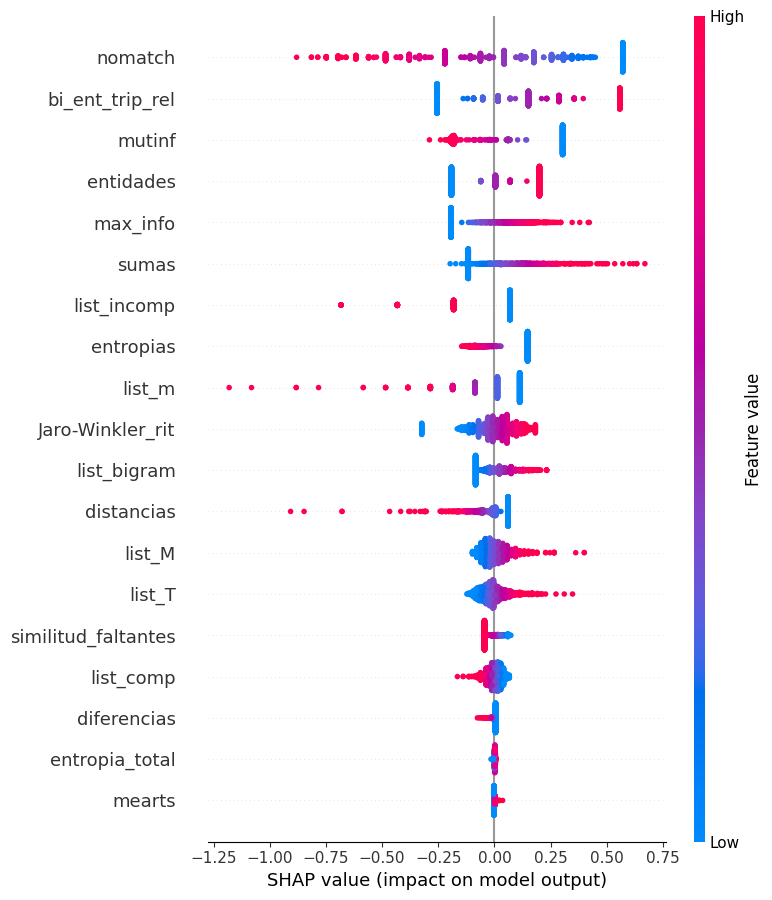

In [96]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

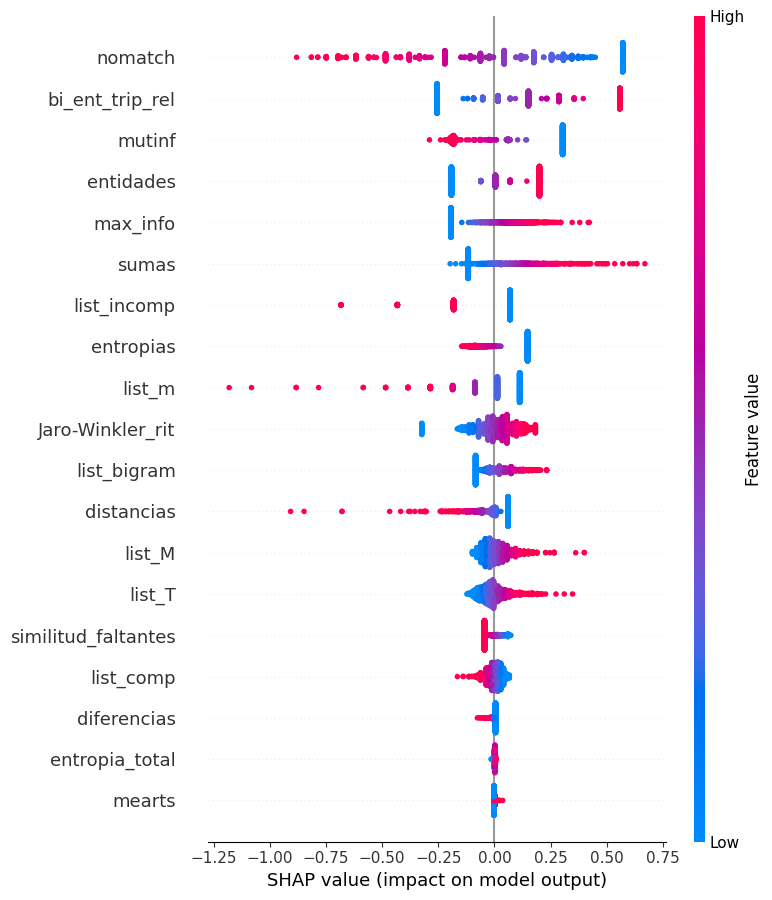

In [97]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

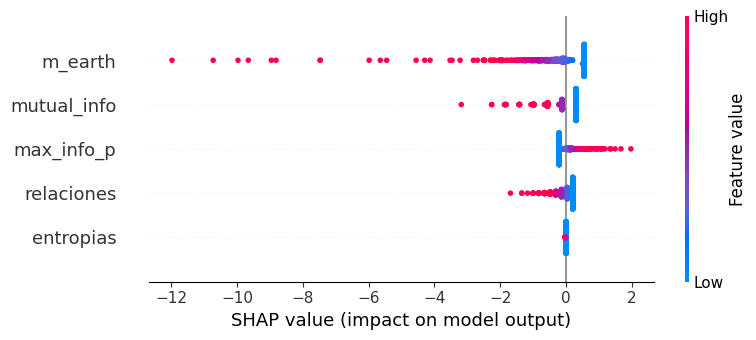

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


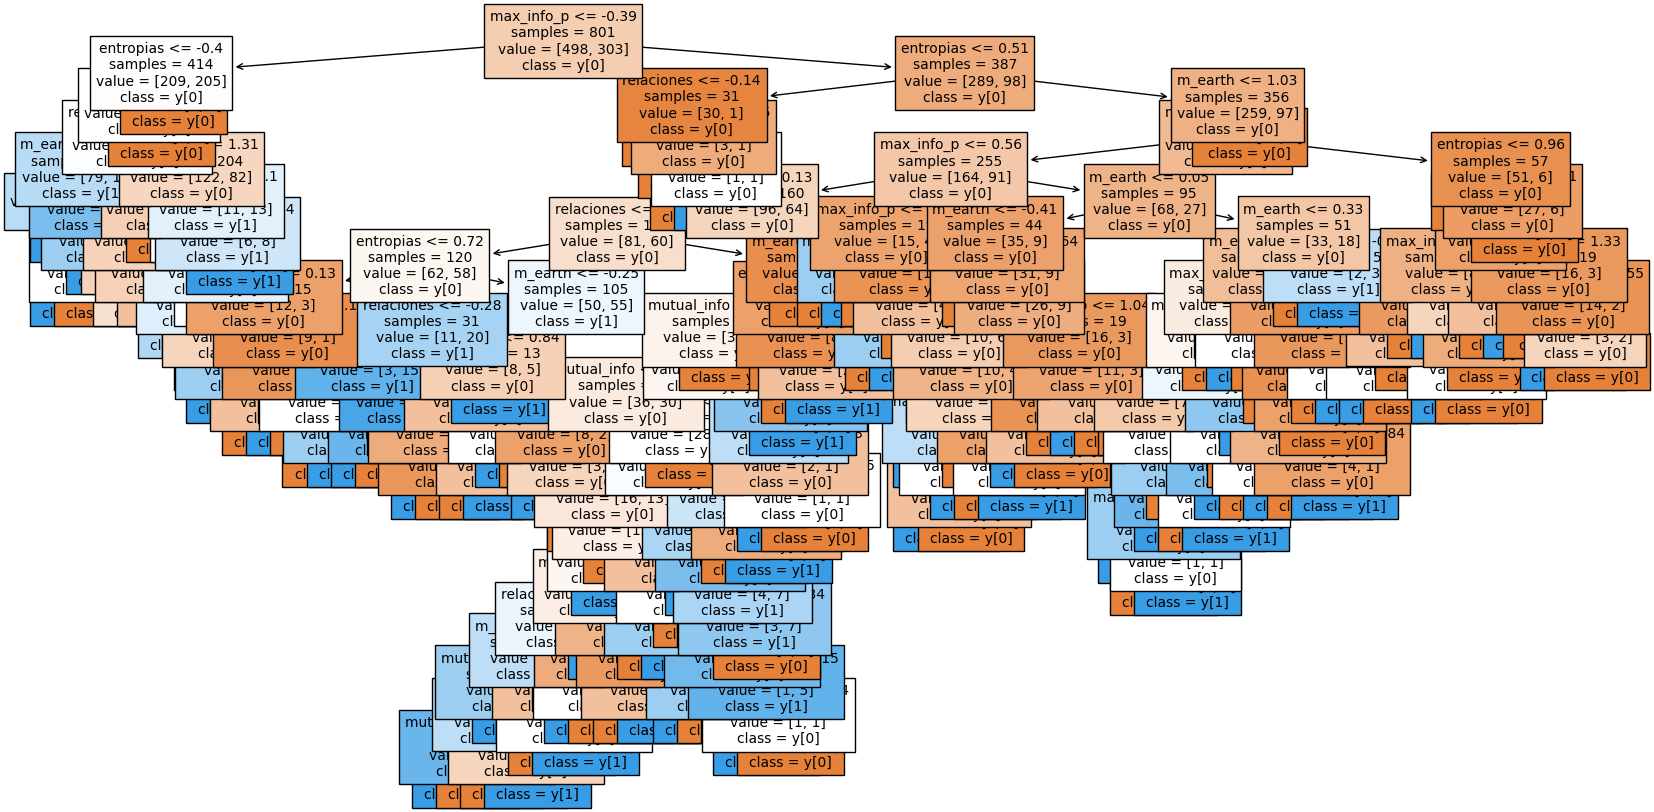

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )